In [1]:
import numpy as np
import pandas as pd
import sklearn.preprocessing as prep
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [2]:
raw = pd.read_csv('Для математики.csv', decimal=',', dtype = {
    'возраст': 'Int64',
    'стадия': 'Int64',
    'тип кости по Mich': 'Int64',
    }, converters = {
    'пол': str.strip,
    'первичный очаг': str.strip,
    'Метастазы': pd.notna,
    'Лечение': lambda x: 'Лечение' if pd.notna(x) and x !='конс' else x,
    'Химиотерапия': pd.notna,
    'тип препарата': lambda x: '' if pd.isna(x) else x.replace('+', '|').replace(',', '|').replace(' ','|')
})
raw.dtypes

ФИО                                object
пол                                object
возраст                             Int64
первичный очаг                     object
Метастазы                            bool
Лечение                            object
Химиотерапия                         bool
диагноз                            object
срок приема ОМА (мес.)              int64
тип препарата                      object
длительность заболевания (год)    float64
стадия                              Int64
тип кости по Mich                   Int64
dtype: object

In [3]:
df = pd.get_dummies(raw[['возраст', 'Метастазы', 'Химиотерапия', 'срок приема ОМА (мес.)', 'длительность заболевания (год)', 'стадия', 'тип кости по Mich']], columns = ['стадия', 'тип кости по Mich']).join([
    raw['пол'].str.get_dummies(),
    raw['первичный очаг'].str.get_dummies(),
    raw['Лечение'].str.get_dummies(),
    raw['тип препарата'].str.get_dummies()
   ])\
    .dropna()
df.columns

Index(['возраст', 'Метастазы', 'Химиотерапия', 'срок приема ОМА (мес.)',
       'длительность заболевания (год)', 'стадия_1', 'стадия_2', 'стадия_3',
       'тип кости по Mich_1', 'тип кости по Mich_2', 'тип кости по Mich_3',
       'тип кости по Mich_4', 'тип кости по Mich_5', 'ж', 'м', 'Лифома',
       'желудок', 'кишечник', 'копчик', 'легкое', 'матка', 'миеломная болезнь',
       'молочн железа', 'остеопороз', 'почка', 'простата', 'ректосигм соед',
       'Лечение', 'конс', 'БФ', 'деносумаб'],
      dtype='object')

In [4]:
X = df[set(df.columns).difference(['длительность заболевания (год)'])].applymap(int)
y = df['длительность заболевания (год)']

In [5]:
regr = LinearRegression().fit(prep.maxabs_scale(X), y)
sorted(zip(X.columns, regr.coef_), key = lambda x: abs(x[1]), reverse = True)

[('возраст', -12.150697203029985),
 ('стадия_1', -8.121983340490301),
 ('Лифома', -7.885846140929211),
 ('легкое', 6.212102774901805),
 ('тип кости по Mich_3', 6.187035719360976),
 ('ректосигм соед', -4.395097930957916),
 ('деносумаб', -4.161512977791532),
 ('стадия_2', -4.14985789221779),
 ('стадия_3', -4.032233998072049),
 ('тип кости по Mich_2', 3.935179586377463),
 ('тип кости по Mich_4', 3.54983913223347),
 ('кишечник', 3.442249169023375),
 ('БФ', -3.2290687348902782),
 ('копчик', 2.4480536266358555),
 ('матка', -1.98722114291342),
 ('м', -1.759213131538786),
 ('ж', 1.7592131315387767),
 ('тип кости по Mich_1', -1.5172092831018194),
 ('конс', 1.4327438370463128),
 ('Лечение', -1.432743837046299),
 ('тип кости по Mich_5', 1.2185552920913236),
 ('остеопороз', -1.209244081268152),
 ('простата', 1.0085467999969573),
 ('почка', 0.9203075800673282),
 ('миеломная болезнь', 0.8577948633472845),
 ('срок приема ОМА (мес.)', -0.737486925845805),
 ('молочн железа', 0.5883544820960847),
 ('Мет

<AxesSubplot:title={'center':'длительность заболевания (год)'}, xlabel='тип кости по Mich'>

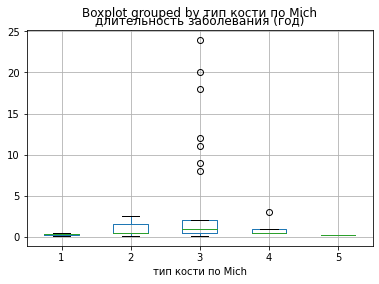

In [9]:
raw.boxplot(by = 'тип кости по Mich', column = 'длительность заболевания (год)')

<AxesSubplot:xlabel='длительность заболевания (год)', ylabel='тип кости по Mich'>

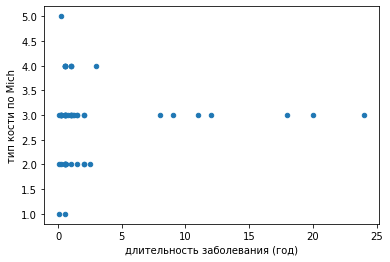

In [11]:
raw.plot(kind = 'scatter', x = 'длительность заболевания (год)', y = 'тип кости по Mich')